In [4]:
# Import necessary Python libraries and modules
# import BARAMBADO1 as BARAMBADO
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd
import os
import handcalcs.render
import forallpeople
from IPython.display import HTML, display, Math, Latex, SVG
from handcalcs.decorator import handcalc
from IPython.display import Markdown as md
from math import sqrt, pi, ceil
from selenium.webdriver.common.by import By
from selenium import webdriver
import time
from collections import defaultdict
import math
import string
from selenium.webdriver.chrome.options import Options
forallpeople.environment("structural", top_level=True)
# Barams = BARAMBADO.Process()

posx and posy should be finite values
posx and posy should be finite values


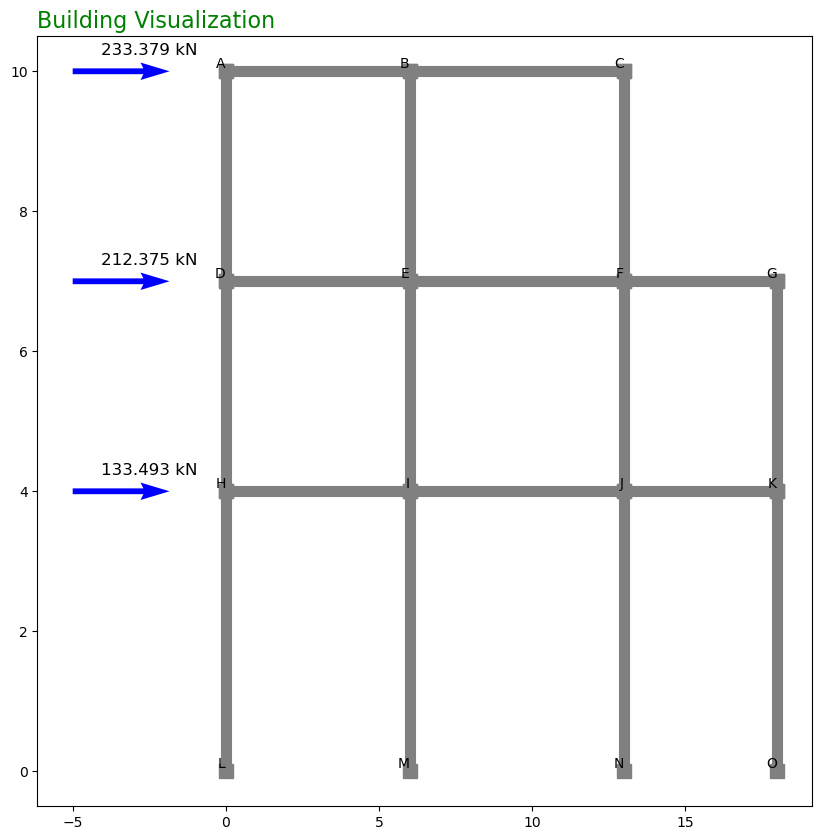

In [ ]:
# Define the function RemoveNan that removes NaN values from a given list of coordinates
def RemoveNan(NodesArrayY, NodesArrayX, NanList):
    Coords = []
    # Loop through the NanList and find the indices in the NodesArrayX and NodesArrayY
    if NanList != None:
        for j in NanList:
            asd, col_indices = np.where(NodesArrayX == j[0])
            row_indices, asd = np.where(NodesArrayY == j[1])
            Coords.append((row_indices[0], col_indices[0]))
        # Replace the found coordinates in the NodesArrayX and NodesArrayY with np.nan
        for j in Coords:
            NodesArrayY[tuple(j)] = np.nan
            NodesArrayX[tuple(j)] = np.nan
    
    # Stack the NodesArrayX and NodesArrayY into a 3D array
    array3d = np.stack((NodesArrayX, NodesArrayY), axis=2)

    return array3d


# Define the function NodesArray that generates an array of nodes for a building
def NodesArray(BayNumber, CumHeight, FloorNumber, CumSpan):
    NodesArrayY = np.array([[i] * (BayNumber + 1) for i in CumHeight], dtype=float)
    NodesArrayX = np.array([CumSpan for i,j in enumerate(CumHeight)], dtype=float)
    return NodesArrayX, NodesArrayY

# Define the function Frame that plots the building visualization
def Frame(Array3d, ForceList, Title = "Building Visualization"):
    # Plot the 2D visualization of the building
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    plt.title(Title, loc="center", fontsize=16, color="green")
    XList, YList = Array3d[:, :, 0].copy(), Array3d[:, :, 1].copy()
    XListT, YListT = XList.T[:, 1:], YList.T[:, 1:]
    ax.plot(
        XList,
        YList,
        label="Line",
        linestyle="-",
        linewidth=8,
        marker="s",
        markersize=10,
        color="gray",
    )
    ax.plot(
        XListT,
        YListT,
        label="Line",
        linestyle="-",
        linewidth=8,
        marker="s",
        markersize=10,
        color="gray",
    )

    # Label the nodes with letter designations starting from the top
    LabelsDict = {}
    letters = string.ascii_uppercase

    node_count = 0
    LetterList = []
    for y, x in zip(YList[::-1].ravel(), XList[::-1].ravel()):
        arr1 = np.array([y, x])
        if not np.isnan(arr1).any():
            ax.text(
                x,
                y,
                f"{letters[node_count]}",
                fontsize=10,
                verticalalignment="bottom",
                horizontalalignment="right",
            )
            node_count += 1
            
        if node_count == len(letters):
            break

    # plt.show()


    return fig,ax,LabelsDict

# Define the function Frame that plots the building visualization
def Frame1(Array3d, ForceList):
    # Plot the 2D visualization of the building
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    plt.title("Building Visualization", loc="left", fontsize=16, color="green")
    XList, YList = Array3d[:, :, 0].copy(), Array3d[:, :, 1].copy()
    XListT, YListT = XList.T[:, 1:], YList.T[:, 1:]
    ax.plot(
        XList,
        YList,
        label="Line",
        linestyle="-",
        linewidth=8,
        marker="s",
        markersize=10,
        color="gray",
    )
    ax.plot(
        XListT,
        YListT,
        label="Line",
        linestyle="-",
        linewidth=8,
        marker="s",
        markersize=10,
        color="gray",
    )

    # Label the nodes with letter designations starting from the top
    LabelsDict = {}
    letters = string.ascii_uppercase

    node_count = 0
    LetterList = []
    for y, x in zip(YList[::-1].ravel(), XList[::-1].ravel()):
        arr1 = np.array([y, x])
        if not np.isnan(arr1).any():
            ax.text(
                x,
                y,
                f"{letters[node_count]}",
                fontsize=10,
                verticalalignment="bottom",
                horizontalalignment="right",
            )
            LetterList.append(f"{letters[node_count]}")
            LabelsDict.update({(x, y): f"{letters[node_count]}"})
            node_count += 1
            
        else: LetterList.append("None")
        if node_count == len(letters):
            break
    
    # Add arrows to the plot
    x_start = np.full_like(XList[:, 0], -5)
    y_start = YList[:, 0]
    y_start[y_start == 0] = np.nan
    dx = np.full_like(x_start, 1)  # Change in x (arrow length)
    dy = y_start * 0
    ax.quiver(x_start, y_start, dx, dy, color="blue", scale=8)

    # Add text to the middle of the arrow
    text_x = x_start + (dx / 2) + 2
    text_y = y_start + 0.3  # Slightly above the arrow
    for i, j in np.ndenumerate(ForceList):
        ax.text(
            text_x[i],
            text_y[i],
            j,
            fontsize=12,
            verticalalignment="center",
            horizontalalignment="center",
        )
    plt.show()
    return fig,ax,LabelsDict

# Define the input parameters for the building visualization
BayNumber = 3
FloorNumber = 3
BuildingHeightList = np.array([4, 3, 3])#bot to top
BuildingSpanList = np.array([6, 7, 5])#left to right
CumSpan = np.insert(
    np.cumsum(BuildingSpanList), 0, 0
)  # cumsum then insert 0 at beginning
CumHeight = np.insert(
    np.cumsum(BuildingHeightList), 0, 0
)  # cumsum then insert 0 at beginning
CumSpanReverse = np.insert(
    np.cumsum(BuildingSpanList[::-1]), 0, 0)
CumHeightReverse = np.insert(np.cumsum(BuildingHeightList[::-1]), 0, 0) 
NanList = [(18, 10)]
ForceList = np.insert(np.array([133.493 * kN, 212.375 * kN, 233.379 * kN]),0,np.nan)#bot to top
ForceListCum = np.cumsum(ForceList[::-1])[::-1]


# BayNumber = 3
# FloorNumber = 3
# BuildingHeightList = np.array([4,5])#bot to top
# BuildingSpanList = np.array([4,6,8])#left to right
# CumSpan = np.insert(
#     np.cumsum(BuildingSpanList), 0, 0
# )  # cumsum then insert 0 at beginning
# CumHeight = np.insert(
#     np.cumsum(BuildingHeightList), 0, 0
# )  # cumsum then insert 0 at beginning
# CumHeightReverse = np.insert(np.cumsum(BuildingHeightList[::-1]), 0, 0) 
# CumSpanReverse = np.insert(
#     np.cumsum(BuildingSpanList[::-1]), 0, 0
# )  # cumsum then insert 0 at beginning
# NanList = None
# ForceList = np.insert(np.array([24 * kN, 48 * kN]),0,np.nan)#bot to top
# ForceListCum = np.cumsum(ForceList[::-1])[::-1]


# Call the NodesArray and RemoveNan functions to generate a 2D visualization of the building
NodesArrayX, NodesArrayY = NodesArray(BayNumber, CumHeight, FloorNumber, CumSpan)

Array3d= RemoveNan(NodesArrayY, NodesArrayX, NanList)

asd,asd1,LabelsDict = Frame1(Array3d, ForceList)


In [ ]:
from itertools import islice


def create_folder(sub_folder):
    path = os.getcwd() + f"\\{sub_folder}"
    isExist = os.path.exists(path)
    if not isExist:
            os.makedirs(path)
    return path
    
def add_latex_data(key, values, discription,test = False):
        
        if key not in LatexData:
            LatexData[key] = [[values, discription]]
        else:
            LatexData[key].append([values, discription])
        if test:
          if key not in testdata:
              testdata[key] = [[values, discription]]
          else:
              testdata[key].append([values, discription])
def chunks(data, SIZE=10000):
        it = iter(data)
        for i in range(0, len(data), SIZE):
            yield {k: data[k] for k in islice(it, SIZE)}
def html_makerl(test=False):
        
        shear_Table = ""
        shear_th = ""
        data1 = LatexData if not test else testdata

        chunk_data = chunks(
            data1, min(10,len(data1))
        )  # Chunks the Data into multiple pieces for easier browsing loading later
        for data_chunk_no, data2 in enumerate(chunk_data):
          shear_Table = ""
          for keys in data2.keys():
                shear_th = ""

                ValueList = data2[keys]
                for i, j in enumerate(ValueList):
                    Key = f"{keys}-{math.ceil(i/3)}"
                    Value = j[0]
                    Description = j[1]
                    shear_th += f"<td><h2>{Description}</h2><p style='font-size:10px;'>{Value}</p></td>"
                shear_Table += (
                    f"""<div ><table id= "{keys}" ><tr>{shear_th}</tr></table></div>"""
                )
          div = (
              """<!DOCTYPE html>
  <html>
    <head>
      <meta charset="UTF-8">
      <title>MathJax Example</title>
      <style>
        body {
          font-family: sans-serif;
        }
        
        /* Add borders to tables */
        table {
          border-collapse: collapse;
          border: 2px solid black;
          margin: 10px 0;
        }
        
        th, td {
          border: 1px solid black;
          padding: 5px;
          vertical-align: top;
        }
      </style>
      <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js?config=TeX-MML-AM_CHTML"></script>
    </head>
    <body>
  %s
    </body>
  </html>

      """
              % shear_Table
          )
          path = create_folder("Beams")
          if not test:
            with open(f"{path}\\{data_chunk_no}.html", "w", encoding="utf-8") as file:
                file.write(div)
          else:
            with open(f"{path}\\test-{data_chunk_no}.html", "w", encoding="utf-8") as file:
              file.write(div)
def selenium_screenshot(test=False):
        data = LatexData if not test else testdata
        new_data = chunks(data, min(10,len(data)))

        for i,j in enumerate(new_data):
            data_chunk_no = i
            data1 = j
            path_latex = create_folder(f"Solutions")
            chrome_options = Options()
            chrome_options.add_argument("--headless")
            chrome_options.add_argument("--window-size=3200x20800")
            driver = webdriver.Chrome(r"chromedriver.exe", options=chrome_options)
            path = create_folder("Beams")
            driver.get(f"{path}\\{data_chunk_no}.html")
            print(f"{path}\\{data_chunk_no}.html")
            time.sleep(10)
            for keys in data1.keys():
                element = driver.find_element(By.ID, keys)
                driver.execute_script("arguments[0].scrollIntoView(true);", element)
                element.screenshot(f"{path_latex}\\{keys}.png")
                time.sleep(0.3)

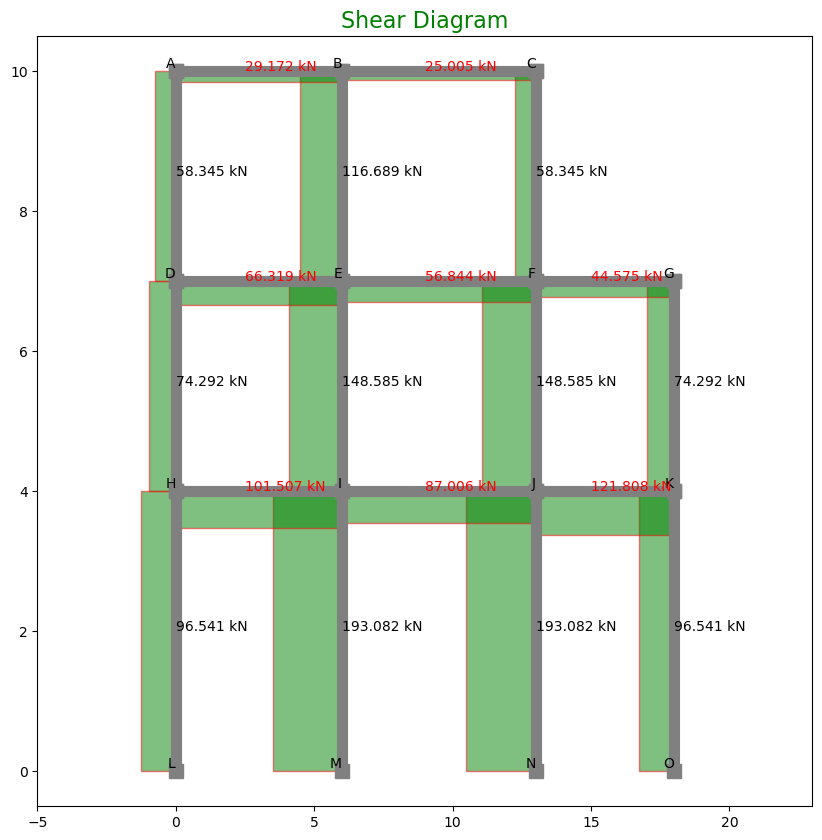

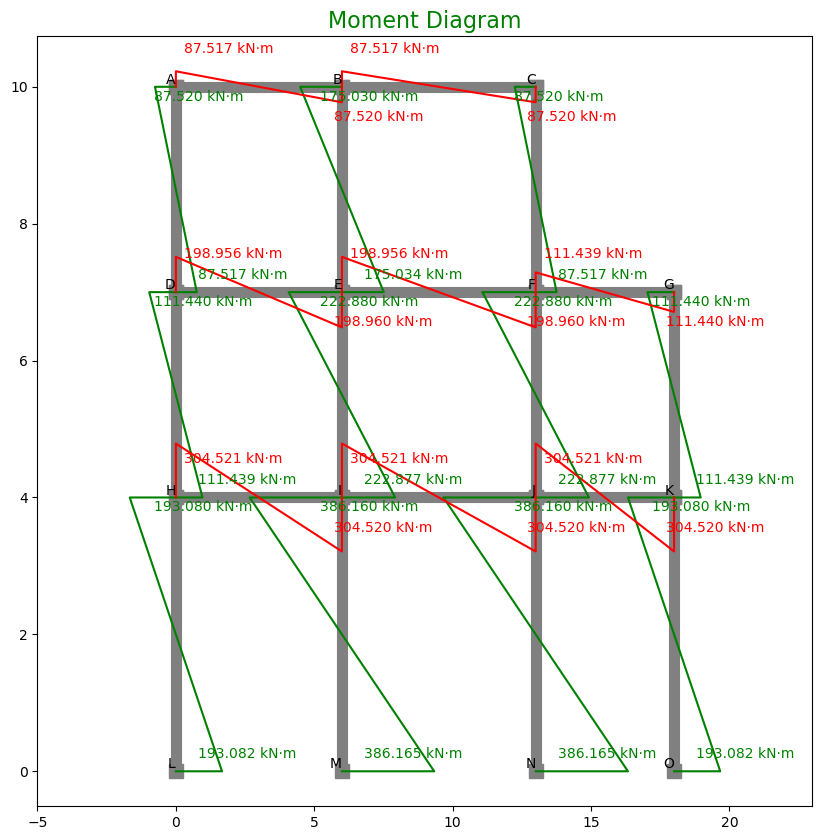

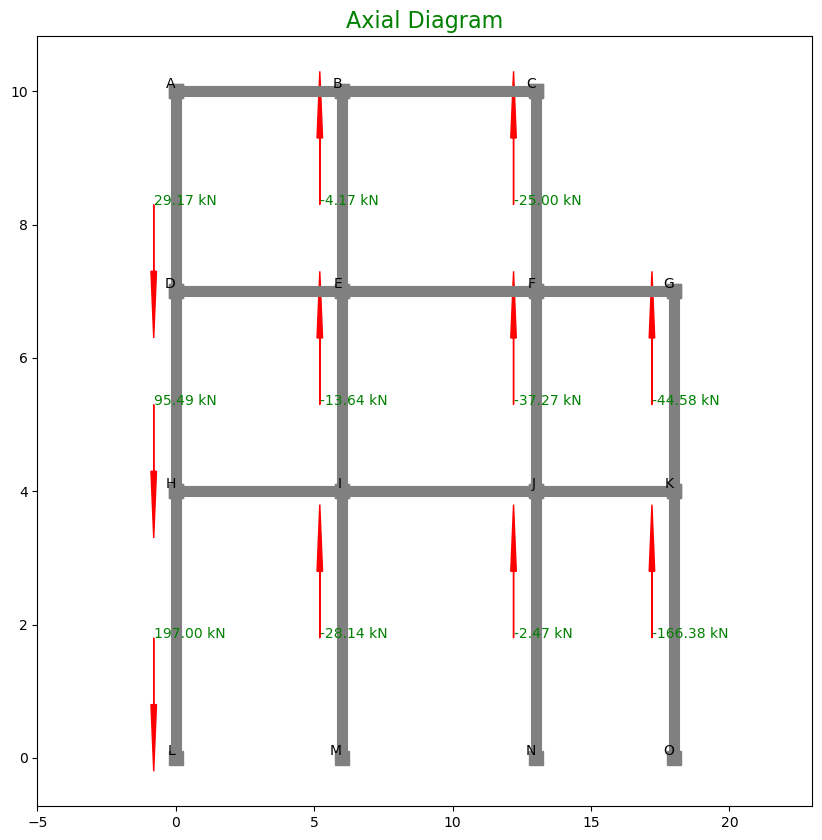

In [ ]:
LatexData = {}

def abs_list(list1):
        for i in range(len(list1)):
            list1[i] = abs(list1[i])
        return list1
def PortalCal(Array3d,sub_folder="Portal Calculations"):

    # Define the Col() function to calculate Shear and EndMoment
    @handcalc(jupyter_display=False, precision=2)
    def Col(length, Force, Side, NumberCol):
        V = Force / NumberCol
        if Side == "Exterior":Shear = V
        elif Side == "Interior":Shear = 2 * V
        EndMoment = Shear * length / 2
        return Shear, EndMoment
    
    @handcalc(override = "long" , jupyter_display=False, precision=2)
    def beam(ColMoment,Length,BeamMoment = [0]):
        EndMoment = sum(ColMoment) - sum(BeamMoment)
        Shear = (EndMoment*2)/Length
        return Shear,EndMoment
    
    @handcalc(override = "long" , jupyter_display=False, precision=2)
    def axialcol(BeamShear, ColAxial = [0]):
        AxialCol = sum(BeamShear) + sum(ColAxial)

        return AxialCol,0
    
    @handcalc(override = "long" , jupyter_display=False, precision=2)
    def AxialBeam(BeamAxial,ColShear,LateralForce = 0):
        BeamAxial = LateralForce  + sum(BeamAxial) - sum(ColShear)
        return BeamAxial, 0
    # Create the ColCoordList
    def create_col_coord_list(Array3d):
        test = np.stack((Array3d[0], Array3d[1]), axis=1)
        return np.array([np.stack((Array3d[i], Array3d[i + 1]), axis=1) if i > 0  else np.stack((Array3d[i], Array3d[i + 1]), axis=1) for i in range(Array3d.shape[0]-1)])

    def create_beam_coord_list(Array3d):
        return np.stack((Array3d[1:,0:-1], Array3d[1:,1:]), axis=2)

    ColCoordList = create_col_coord_list(Array3d)
    BeamCoordList = create_beam_coord_list(Array3d)
    ColShear = {}
    ColEndMoment = {}
    # Iterate through the ColCoordList, calculate Shear and EndMoment, and store the results in the dictionaries
    for i, j in enumerate(ColCoordList):
        j = j[~np.isnan(j).any(axis=(1,2))]
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                length = j1[1][1] * m - j1[0][1] * m
                Shear = ForceListCum[i+1]
                Side = "Exterior" if i1 == 0 or i1 == len(j) - 1 else "Interior"
                NumberCol = len(j) * 2 -2
                LatexCol, asd = Col(length, Shear, Side, NumberCol)

                add_latex_data(f"Portal-Col-{i}",LatexCol,ColName)
                ColShear.update({tuple(j1[0]): [asd[0] * -1]}) if ColShear.get(tuple(j1[0])) is None else ColShear.get(tuple(j1[0])).append(asd[0]* -1)
                ColShear.update({tuple(j1[1]): [asd[0]]}) if ColShear.get(tuple(j1[1])) is None else ColShear.get(tuple(j1[1])).append(asd[0])

                ColEndMoment.update({tuple(j1[0]): [asd[1]* -1]}) if ColEndMoment.get(tuple(j1[0])) is None else ColEndMoment.get(tuple(j1[0])).append(asd[1]* -1)
                ColEndMoment.update({tuple(j1[1]): [asd[1]]}) if ColEndMoment.get(tuple(j1[1])) is None else ColEndMoment.get(tuple(j1[1])).append(asd[1])



    BeamEndMoment = {}
    BeamShear = {}
    for i, j in enumerate(BeamCoordList):
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                BeamName = f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                length = j1[1][0] * m - j1[0][0] * m
                Side = "Exterior" if i1 == 0 or i1 == len(j) - 1 else "Interior"
                colmoment = abs_list(ColEndMoment.get(tuple(j1[0])))
                beammoment = abs_list(BeamEndMoment.get(tuple(j1[0]))) if BeamShear.get(tuple(j1[0])) is not None else [0]
                if not BeamEndMoment.get(tuple(j1[0])) is None:
                    LatexBeam, asd = beam(colmoment,length,beammoment)
                else:
                    LatexBeam, asd = beam(colmoment,length)
  
                add_latex_data(f"Portal-Beam-{i}",LatexBeam,BeamName)
                BeamShear.update({tuple(j1[0]): [asd[0]]}) if BeamShear.get(tuple(j1[0])) is None else BeamShear.get(tuple(j1[0])).append(asd[0])
                BeamShear.update({tuple(j1[1]): [asd[0]* -1]}) if BeamShear.get(tuple(j1[1])) is None else BeamShear.get(tuple(j1[1])).append(asd[0* -1])

                BeamEndMoment.update({tuple(j1[0]): [asd[1]]}) if BeamEndMoment.get(tuple(j1[0])) is None else BeamEndMoment.get(tuple(j1[0])).append(asd[1])
                BeamEndMoment.update({tuple(j1[1]): [asd[1]* -1]}) if BeamEndMoment.get(tuple(j1[1])) is None else BeamEndMoment.get(tuple(j1[1])).append(asd[1]* -1)


    ColAxial = {}
    for i, j in enumerate(ColCoordList[::-1]):
        j = j[~np.isnan(j).any(axis=(1,2))]
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"

                # BeamList = BeamShear.get(tuple(j1[0]))
                Axial = [0] if ColAxial.get(tuple(j1[1])) is None  else ColAxial.get(tuple(j1[1]))
                BeamList = [0] if BeamShear.get(tuple(j1[1])) is None  else BeamShear.get(tuple(j1[1]))
                LatexColAxial, asd = axialcol(BeamList,Axial)

                add_latex_data(f"Portal-ColAxial-{i}",LatexColAxial,ColName)
                ColAxial.update({tuple(j1[0]): [asd[0]]}) if ColAxial.get(tuple(j1[0])) is None else ColAxial.get(tuple(j1[0])).append(asd[0])
                ColAxial.update({tuple(j1[1]): [asd[0]*-1]}) if ColAxial.get(tuple(j1[1])) is None else ColAxial.get(tuple(j1[1])).append(asd[0]*-1)

    BeamAxial = {}
    for i, j in enumerate(BeamCoordList[::-1]):
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                force = ForceList[::-1][i]
                
                BeamName = f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                length = j1[1][0]  - j1[0][0] 
                # BeamList = BeamShear.get(tuple(j1[0]))
                beamaxial = [0] if BeamAxial.get(tuple(j1[1])) is None  else abs_list(BeamAxial.get(tuple(j1[1])))
                colshearcanti = [0] if ColShear.get(tuple(j1[1])) is None  else ColShear.get(tuple(j1[1]))
                if len(colshearcanti) > 1:
                    colshearcanti[0] = colshearcanti[0]*-1
                if i1 == 0:
                    LatexBeamAxial, asd = AxialBeam(beamaxial,colshearcanti,force)
                else:
                    LatexBeamAxial, asd = AxialBeam(beamaxial,colshearcanti) 

                add_latex_data(f"Portal-BeamAxial-{i}",LatexBeamAxial,BeamName)
                BeamAxial.update({tuple(j1[0]): [asd[0]]}) if BeamAxial.get(tuple(j1[0])) is None else BeamAxial.get(tuple(j1[0])).append(asd[0])
                BeamAxial.update({tuple(j1[1]): [asd[0]*-1]}) if BeamAxial.get(tuple(j1[1])) is None else BeamAxial.get(tuple(j1[1])).append(asd[0]*-1)

    return ColCoordList,ColEndMoment,ColShear,ColAxial,BeamCoordList,BeamEndMoment,BeamShear,BeamAxial

def PortalPlot(Array3d,ForceList,ColCoordList,ColEndMoment,ColShear,BeamCoordList,BeamEndMoment,BeamShear,sub_folder="Portal Calculations"):
    path = create_folder(sub_folder)
    ColShear_Fig, ColShear_Ax,asd = Frame(Array3d,ForceList, "Shear Diagram")
    for i,j in enumerate(ColCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                x = int(j1[0][0])
                y = int(j1[0][1])
                scale = 1.5
                shear = abs(ColShear.get(tuple(j1[1]))[0])/kN
                width = -1*(min(sum(BuildingSpanList)/len(BuildingSpanList),min(BuildingSpanList))*scale*(shear/(np.nanmax(ForceListCum)/kN)))
                height = (int(j1[1][1]) - int(j1[0][1]))
                ColShear_Ax.text(x, y+(height/2) , shear*kN)
                rect = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='green', alpha=0.5)
                ColShear_Ax.add_patch(rect)

    for i,j in enumerate(BeamCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                offsettext = 0.5
                x = int(j1[0][0])
                y = int(j1[0][1])
                scale = 1
                shear = abs(BeamShear.get(tuple(j1[1]))[0])/kN
                width = -1*(min(sum(BuildingHeightList)/len(BuildingHeightList),min(BuildingHeightList))*scale*(shear/(np.nanmax(ForceListCum)/kN)))
                length = (int(j1[1][0]) - int(j1[0][0]))
                ColShear_Ax.text(x+(length/2)-offsettext, y , shear*kN,color = "red")
                rect = patches.Rectangle((x,y),length,width,linewidth=1,edgecolor='r',facecolor='green', alpha=0.5)
                ColShear_Ax.add_patch(rect)
    ColShear_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
    ColShear_Fig.savefig(f"{path}\\PortalShear.png", dpi=300)

    ColMoment_Fig, ColMoment_Ax,asd = Frame(Array3d,ForceList, "Moment Diagram")
    for i,j in enumerate(ColCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.2
                offsetx = 0.8 
                scale = 2
                Moment = abs(ColEndMoment.get(tuple(j1[1]))[0])/(kN*m)
                width = min(sum(BuildingSpanList)/len(BuildingSpanList),min(BuildingSpanList)/2)*scale*(Moment/(np.nanmax(ForceListCum)/kN))
                height = (int(j1[1][1]) - int(j1[0][1]))
                ColMoment_Ax.text(x-offsetx, y+ height -offsety  , round(Moment,2)*kN*m,color = "green")
                ColMoment_Ax.text(x+offsetx, y+ offsety , Moment*kN*m,color = "green")
                ColMoment_Ax.plot([x, x+width,  x-width, x],
                  [y, y, y+height, y+height], 
                          color='green')
                
    for i,j in enumerate(BeamCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.5
                offsetx = 0.3 
                scale = 1
                Moment = abs(BeamEndMoment.get(tuple(j1[1]))[0])/(kN*m)
                width = min(sum(BuildingHeightList)/len(BuildingHeightList),min(BuildingHeightList)/2)*scale*(Moment/(np.nanmax(ForceListCum)/kN))
                length = (int(j1[1][0]) - int(j1[0][0]))
                ColMoment_Ax.text(x+length-offsetx, y-offsety  , round(Moment,2)*kN*m,color = "red")
                ColMoment_Ax.text(x+offsetx, y+ offsety , Moment*kN*m,color = "red")
                ColMoment_Ax.plot([x, x,  x+length, x+length],
                  [y, y+width, y-width, y], 
                          color='red')
    ColMoment_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
    ColMoment_Fig.savefig(f"{path}\\PortalMoment.png", dpi=300)

    ColAxial_Fig, ColAxial_Ax,asd = Frame(Array3d,ForceList, "Axial Diagram")
    for i,j in enumerate(ColCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.2
                offsetx = 0.8 
                scale = 2
                height = (int(j1[1][1]) - int(j1[0][1]))
                Axial = (ColAxial.get(tuple(j1[0]))[0])
                
                ColAxial_Ax.arrow(x-offsetx, y+ height/2 -offsety, 0, -1, color='red', head_width=0.2, head_length=1) if Axial > 0 else ColAxial_Ax.arrow(x-offsetx, y+ height/2 -offsety, 0, 1, color='red', head_width=0.2, head_length=1)

                ColAxial_Ax.text(x-offsetx, y+ height/2 -offsety  , round(Axial,2),color = "green")

                
    # for i,j in enumerate(BeamCoordList):
    #     for i1,j1 in enumerate(j):
    #         if not np.isnan(j1).any():
    #             x = int(j1[0][0])
    #             y = int(j1[0][1])
    #             offsety = 0.5
    #             offsetx = 0.3 
    #             scale = 1
    #             Axial = (BeamAxial.get(tuple(j1[1]))[0])
                
    #             length = (int(j1[1][0]) - int(j1[0][0]))

    #             ColAxial_Ax.arrow(x+ length/2, y+ offsety , -1, 0, color='red', head_width=0.2, head_length=1) if Axial > 0 else ColAxial_Ax.arrow(x+ length/2 , y + offsety, 1, 0, color='red', head_width=0.2, head_length=1)

    #             ColAxial_Ax.text(x+ length/2, y , round(Axial,2),color = "green")

    ColAxial_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
    ColAxial_Fig.savefig(f"{path}\\PortalAxial.png", dpi=300)
    return ColShear_Fig, ColShear_Ax





ColCoordList,ColEndMoment,ColShear,ColAxial,BeamCoordList,BeamEndMoment,BeamShear,BeamAxial = PortalCal(Array3d)
# html_makerl()

ColShear_Fig, ColShear_Ax = PortalPlot(Array3d,ForceList,ColCoordList,ColEndMoment,ColShear,BeamCoordList,BeamEndMoment,BeamShear)


[0] [57.093 kN] 233.379 kN
[176.286 kN] [127.207 kN] 233.379 kN
[0] [-57.093 kN, 21.409 kN] 212.375 kN
[248.059 kN] [-127.207 kN, 94.956 kN] 212.375 kN
[280.310 kN] [-70.114 kN, 180.434 kN] 212.375 kN
[0] [-21.409 kN, 119.694 kN] 133.493 kN
[35.208 kN] [-94.956 kN, 278.554 kN] 133.493 kN
[148.391 kN] [-180.434 kN, 185.705 kN] 133.493 kN


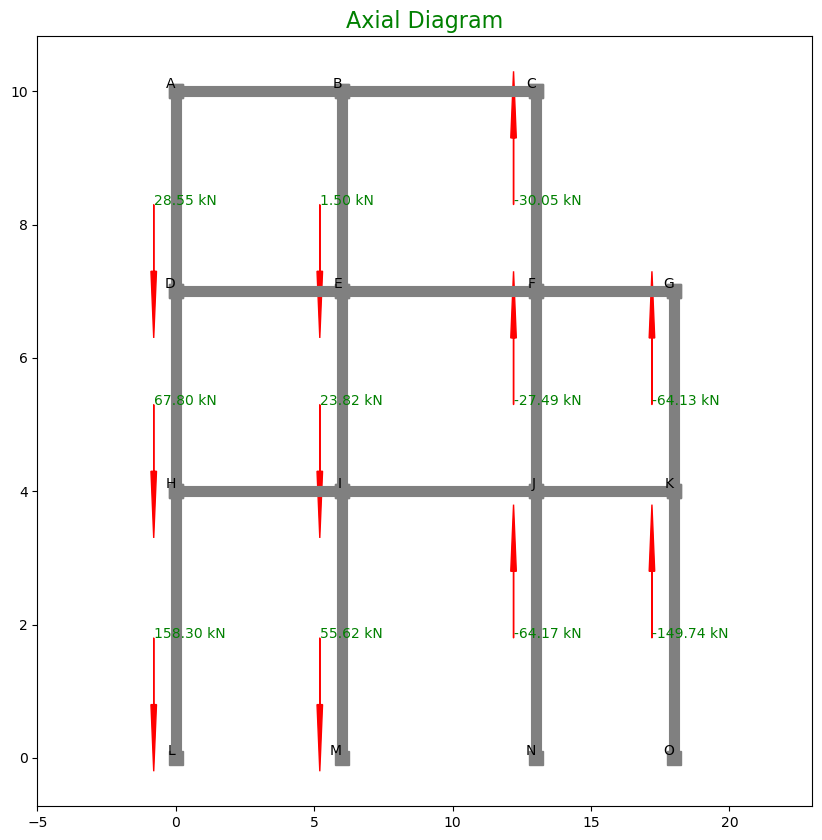

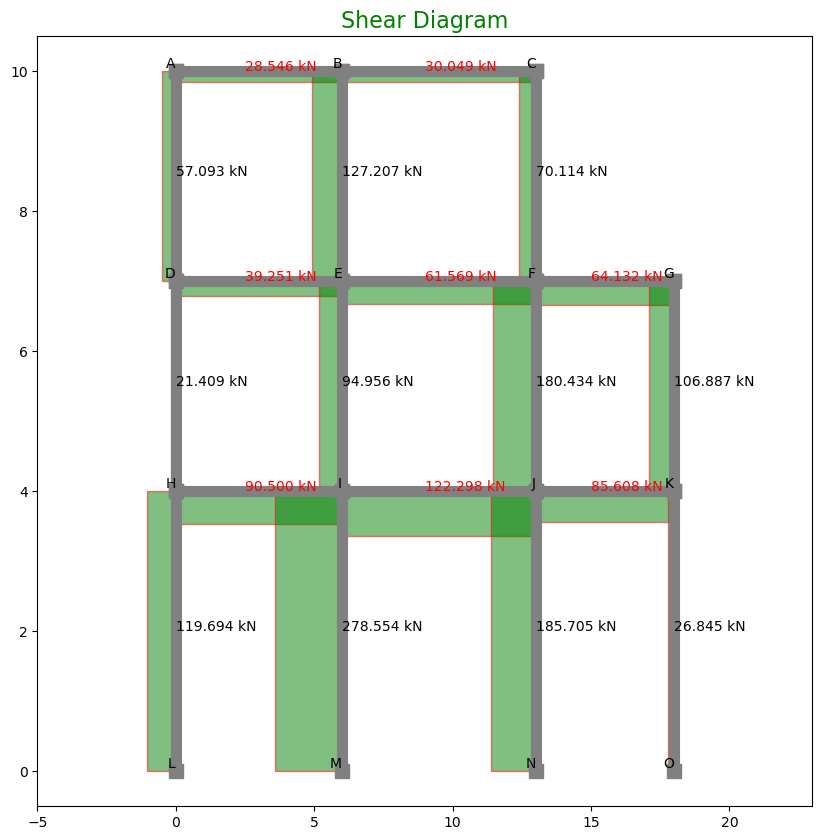

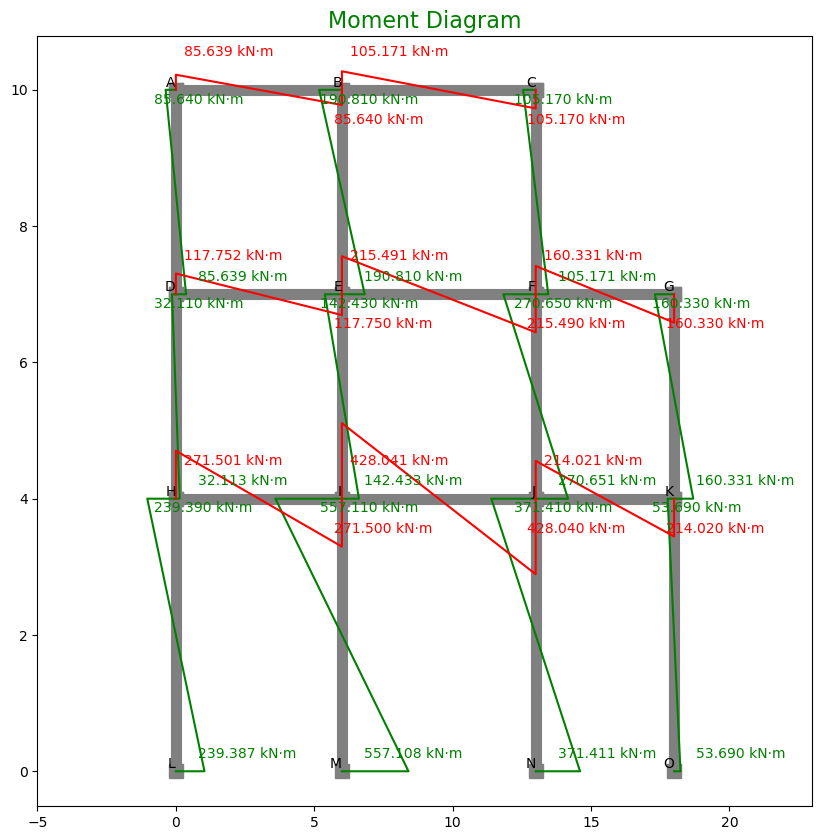

In [ ]:
@handcalc(override = "long" , jupyter_display=False, precision=5)
def ColAxialCanti(ColList,Col_Number,Force,ForceHeight,SpanCum):
    X_bar = sum(ColList)/Col_Number #Since Same Section
    ColCoefficient = (X_bar - ColList) /X_bar
    Moment = sum(Force*ForceHeight)/sum(ColCoefficient*SpanCum) # Moment of Leftmost Column
    ColAxialArray = ColCoefficient * Moment
    return ColAxialArray

@handcalc(override = "long" , jupyter_display=False, precision=2)
def BeamShearMoment(ColShear,length, BeamAxial = [0]):
        Shear = sum(ColShear) - sum(BeamAxial)
        Moment = Shear * length/2
        return Shear,Moment

@handcalc(override = "long" , jupyter_display=False, precision=2)
def ColMomentShear(BeamMoment,Height, ColMoment = [0]):
        Moment = sum(BeamMoment) - sum(ColMoment)
        Shear = (Moment*2)/Height
        return Moment,Shear

@handcalc(override = "long" , jupyter_display=False, precision=2)
def BeamAxial(BeamAxial,ColShear,LateralForce = 0):
     BeamAxial = LateralForce - sum(ColShear) + sum(BeamAxial)
     return BeamAxial, 0
path = create_folder("Canti Pics")
AxialColCanti = {}
ColPerFloor = (ColCoordList[:,:,-1,0])
for i,ColList in enumerate(ColPerFloor[::-1]):
    Floor = f"Floor-{len(BuildingHeightList)-i}"
    SpanCum = CumSpanReverse[~np.isnan(ColList)][::-1]

    ColList = ColList[~np.isnan(ColList)]

    Col_Number = len(ColList)
    ForceReverse = ForceList[::-1]
    HeightReverse = BuildingHeightList[::-1]
    
    LateralForce = ForceReverse[:i+1]
    HeightArray = np.cumsum((HeightReverse[:i+1].copy()).astype(np.float64)[::-1])[::-1]

    HeightArray = HeightArray - HeightArray[-1]/2

    latexAxialCanti,AxialCol = ColAxialCanti(ColList,Col_Number,LateralForce,HeightArray,SpanCum)
    add_latex_data(f"Canti-ColAxial-{i}",latexAxialCanti,Floor)
    for i2,asd in enumerate(AxialCol):
        j1 = ColCoordList[::-1][i][i2]
        AxialColCanti.update({tuple(j1[0]): [asd]}) if AxialColCanti.get(tuple(j1[0])) is None else AxialColCanti.get(tuple(j1[0])).append(asd)
        AxialColCanti.update({tuple(j1[1]): [asd*-1]}) if AxialColCanti.get(tuple(j1[1])) is None else AxialColCanti.get(tuple(j1[1])).append(asd*-1)


BeamShearCanti = {}
BeamMomentCanti = {}
for i, j in enumerate(BeamCoordList[::-1]):
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                BeamName = f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                length = j1[1][0]  - j1[0][0] 
                # BeamList = BeamShear.get(tuple(j1[0]))
                Shear = [0] if BeamShearCanti.get(tuple(j1[0])) is None  else BeamShearCanti.get(tuple(j1[0]))
                ColList = [0] if AxialColCanti.get(tuple(j1[0])) is None  else AxialColCanti.get(tuple(j1[0]))

                LatexBeamAxial, asd = BeamShearMoment(ColList,length,Shear)

                add_latex_data(f"Canti-Beam-{i}",LatexBeamAxial,BeamName)
                BeamShearCanti.update({tuple(j1[0]): [asd[0]]}) if BeamShearCanti.get(tuple(j1[0])) is None else BeamShearCanti.get(tuple(j1[0])).append(asd[0])
                BeamShearCanti.update({tuple(j1[1]): [asd[0]*-1]}) if BeamShearCanti.get(tuple(j1[1])) is None else BeamShearCanti.get(tuple(j1[1])).append(asd[0]*-1)
                BeamMomentCanti.update({tuple(j1[0]): [asd[1]]}) if BeamMomentCanti.get(tuple(j1[0])) is None else BeamMomentCanti.get(tuple(j1[0])).append(asd[1])
                BeamMomentCanti.update({tuple(j1[1]): [asd[1]*-1]}) if BeamMomentCanti.get(tuple(j1[1])) is None else BeamMomentCanti.get(tuple(j1[1])).append(asd[1]*-1)


ColMomentCanti = {}
ColShearCanti = {}
for i, j in enumerate(ColCoordList[::-1]):
        j = j[~np.isnan(j).any(axis=(1,2))]
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                height = (int(j1[1][1]) - int(j1[0][1]))
                # BeamList = BeamShear.get(tuple(j1[0]))
                ColMomentArray = [0] if ColMomentCanti.get(tuple(j1[1])) is None  else ColMomentCanti.get(tuple(j1[1]))
                BeamMomentArray = [0] if BeamMomentCanti.get(tuple(j1[1])) is None  else abs_list(BeamMomentCanti.get(tuple(j1[1])))
                # print(ColName)
                # print(ColMomentArray,BeamMomentArray)
                LatexColAxial, asd = ColMomentShear(BeamMomentArray,height,ColMomentArray)
                # print(asd[0] )

                add_latex_data(f"Canti-Col-{i}",LatexColAxial,ColName)
                ColMomentCanti.update({tuple(j1[0]): [asd[0]]}) if ColMomentCanti.get(tuple(j1[0])) is None else ColMomentCanti.get(tuple(j1[0])).append(asd[0])
                ColMomentCanti.update({tuple(j1[1]): [asd[0]*-1]}) if ColMomentCanti.get(tuple(j1[1])) is None else ColMomentCanti.get(tuple(j1[1])).append(asd[0]*-1)
                ColShearCanti.update({tuple(j1[0]): [asd[1]]}) if ColShearCanti.get(tuple(j1[0])) is None else ColShearCanti.get(tuple(j1[0])).append(asd[1])
                ColShearCanti.update({tuple(j1[1]): [asd[1]*-1]}) if ColShearCanti.get(tuple(j1[1])) is None else ColShearCanti.get(tuple(j1[1])).append(asd[1]*-1)

BeamAxialCanti = {}
for i, j in enumerate(BeamCoordList[::-1]):
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                force = ForceList[::-1][i]
                
                BeamName = f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                length = j1[1][0]  - j1[0][0] 
                # BeamList = BeamShear.get(tuple(j1[0]))
                beamaxial = [0] if (BeamAxialCanti.get(tuple(j1[0]))) is None  else abs_list(BeamAxialCanti.get(tuple(j1[0])))
                colshearcanti = [0] if (ColShearCanti.get(tuple(j1[0]))) is None  else abs_list(ColShearCanti.get(tuple(j1[0])))
                if len(colshearcanti) > 1:
                    colshearcanti[0] = colshearcanti[0]*-1
                print(beamaxial,colshearcanti,force)
                if i1 == 0:
                    LatexBeamAxial, asd = BeamAxial(beamaxial,colshearcanti,force)
                else:
                    LatexBeamAxial, asd = BeamAxial(beamaxial,colshearcanti) 

                add_latex_data(f"Canti-BeamAxial-{i}",LatexBeamAxial,BeamName)
                BeamAxialCanti.update({tuple(j1[0]): [asd[0]]}) if BeamAxialCanti.get(tuple(j1[0])) is None else BeamAxialCanti.get(tuple(j1[0])).append(asd[0])
                BeamAxialCanti.update({tuple(j1[1]): [asd[0]*-1]}) if BeamAxialCanti.get(tuple(j1[1])) is None else BeamAxialCanti.get(tuple(j1[1])).append(asd[0]*-1)




ColAxialCanti_Fig, ColAxialCanti_Ax,asd = Frame(Array3d,ForceList, "Axial Diagram")
for i,j in enumerate(ColCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.2
                offsetx = 0.8 
                scale = 2

                Axial = (AxialColCanti.get(tuple(j1[0]))[0])
                height = (int(j1[1][1]) - int(j1[0][1]))
                ColAxialCanti_Ax.arrow(x-offsetx, y+ height/2 -offsety, 0, -1, color='red', head_width=0.2, head_length=1) if Axial > 0 else ColAxialCanti_Ax.arrow(x-offsetx, y+ height/2 -offsety, 0, 1, color='red', head_width=0.2, head_length=1)

                ColAxialCanti_Ax.text(x-offsetx, y+ height/2 -offsety  , round(Axial,2),color = "green")


ColShearCanti_Fig, ColShearCanti_Ax,asd = Frame(Array3d,ForceList, "Shear Diagram")
for i,j in enumerate(BeamCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                offsettext = 0.5
                x = int(j1[0][0])
                y = int(j1[0][1])
                scale = 1
                shear = (BeamShearCanti.get(tuple(j1[1]))[0])/kN
                width = -1*(min(sum(BuildingHeightList)/len(BuildingHeightList),min(BuildingHeightList))*scale*(shear/(np.nanmax(ForceListCum)/kN)))
                length = (int(j1[1][0]) - int(j1[0][0]))
                ColShearCanti_Ax.text(x+(length/2)-offsettext, y , shear*kN,color = "red")
                rect = patches.Rectangle((x,y),length,width,linewidth=1,edgecolor='r',facecolor='green', alpha=0.5)
                ColShearCanti_Ax.add_patch(rect)


for i,j in enumerate(ColCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                x = int(j1[0][0])
                y = int(j1[0][1])
                scale = 1
                shear = abs((ColShearCanti.get(tuple(j1[0]))[0])/kN)
                width = -1*(min(sum(BuildingSpanList)/len(BuildingSpanList),min(BuildingSpanList))*scale*(shear/(np.nanmax(ForceListCum)/kN)))
                height = (int(j1[1][1]) - int(j1[0][1]))
                ColShearCanti_Ax.text(x, y+(height/2) , shear*kN)
                rect = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='green', alpha=0.5)
                ColShearCanti_Ax.add_patch(rect)

ColShearCanti_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
ColShearCanti_Fig.savefig(f"{path}\\CantiShear.png", dpi=300)

ColMomentCanti_Fig, ColMomentCanti_Ax,asd = Frame(Array3d,ForceList, "Moment Diagram")
for i,j in enumerate(ColCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.2
                offsetx = 0.8 
                scale = 1
                Moment = abs(ColMomentCanti.get(tuple(j1[0]))[0])/(kN)
                width = min(sum(BuildingSpanList)/len(BuildingSpanList),min(BuildingSpanList)/2)*scale*(Moment/(np.nanmax(ForceListCum)/kN))
                height = (int(j1[1][1]) - int(j1[0][1]))
                ColMomentCanti_Ax.text(x-offsetx, y+ height -offsety  , round(Moment,2)*kN*m,color = "green")
                ColMomentCanti_Ax.text(x+offsetx, y+ offsety , Moment*kN*m,color = "green")
                ColMomentCanti_Ax.plot([x, x+width,  x-width, x],
                  [y, y, y+height, y+height], 
                          color='green')
                
for i,j in enumerate(BeamCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.5
                offsetx = 0.3 
                scale = 1
                Moment = abs(BeamMomentCanti.get(tuple(j1[1]))[0])/(kN)
                width = min(sum(BuildingHeightList)/len(BuildingHeightList),min(BuildingHeightList)/2)*scale*(Moment/(np.nanmax(ForceListCum)/kN))
                length = (int(j1[1][0]) - int(j1[0][0]))
                ColMomentCanti_Ax.text(x+length-offsetx, y-offsety  , round(Moment,2)*kN*m,color = "red")
                ColMomentCanti_Ax.text(x+offsetx, y+ offsety , Moment*kN*m,color = "red")
                ColMomentCanti_Ax.plot([x, x,  x+length, x+length],
                  [y, y+width, y-width, y], 
                          color='red')
ColMomentCanti_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
ColMomentCanti_Fig.savefig(f"{path}\\CantiMoment.png", dpi=300)


# for i,j in enumerate(BeamCoordList):
#         for i1,j1 in enumerate(j):
#             if not np.isnan(j1).any():
#                 x = int(j1[0][0])
#                 y = int(j1[0][1])
#                 offsety = 0.5
#                 offsetx = 0.3 
#                 scale = 1
#                 Axial = (BeamAxialCanti.get(tuple(j1[1]))[0])
                
#                 length = (int(j1[1][0]) - int(j1[0][0]))

#                 ColAxialCanti_Ax.arrow(x+ length/2, y + offsety , -1, 0, color='red', head_width=0.2, head_length=1) if Axial > 0 else ColAxialCanti_Ax.arrow(x+ length/2 , y + offsety, 1, 0, color='red', head_width=0.2, head_length=1)

#                 ColAxialCanti_Ax.text(x+ length/2, y , round(Axial,2),color = "green")
ColAxialCanti_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
ColAxialCanti_Fig.savefig(f"{path}\\CantiAxial.png", dpi=300)


{(0.0, 10.0): 0.5586206896551722, (6.0, 10.0): 0.7015323117921385, (13.0, 10.0): 0.5203426124197001, (0.0, 7.0): 0.38755980861244, (6.0, 7.0): 0.5402770651616212, (13.0, 7.0): 0.5655546935608999, (18.0, 7.0): 0.6029776674937963, (0.0, 4.0): 0.4196891191709843, (6.0, 4.0): 0.5732172019597168, (13.0, 4.0): 0.5980311730926988, (18.0, 4.0): 0.4646271510516251}
{(0.0, 10.0): 0.44137931034482775, (6.0, 10.0): 0.2984676882078615, (13.0, 10.0): 0.4796573875802999, (0.0, 7.0): 0.61244019138756, (6.0, 7.0): 0.4597229348383788, (13.0, 7.0): 0.4344453064391001, (18.0, 7.0): 0.3970223325062036, (0.0, 4.0): 0.5803108808290157, (6.0, 4.0): 0.4267827980402832, (13.0, 4.0): 0.4019688269073012, (18.0, 4.0): 0.5353728489483749}
[ 0. 10.] NODE-A
[0.0005315518390038825] 0.0005315518390038825 0 [107.270 kN]
[ 6. 10.] NODE-B
[0.00046724160904224775, 0.00040049280775049807] 0.00046724160904224775 0.00040049280775049807 [138.531 kN]
[0. 7.] NODE-D
[0.0007580714929260742] 0.0007580714929260742 0 [95.076 kN, 141

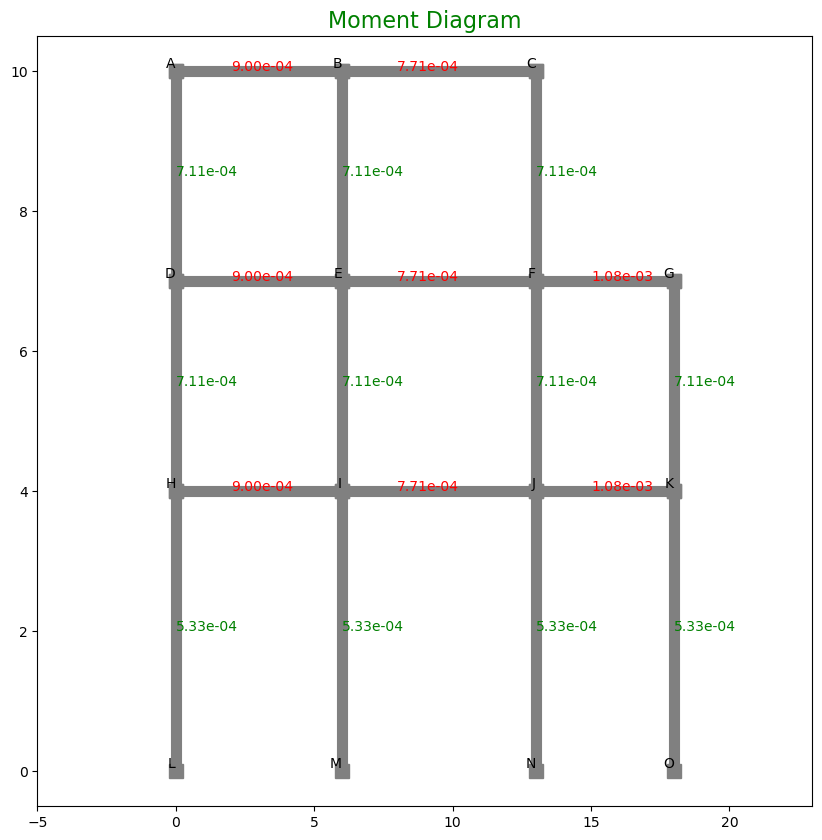

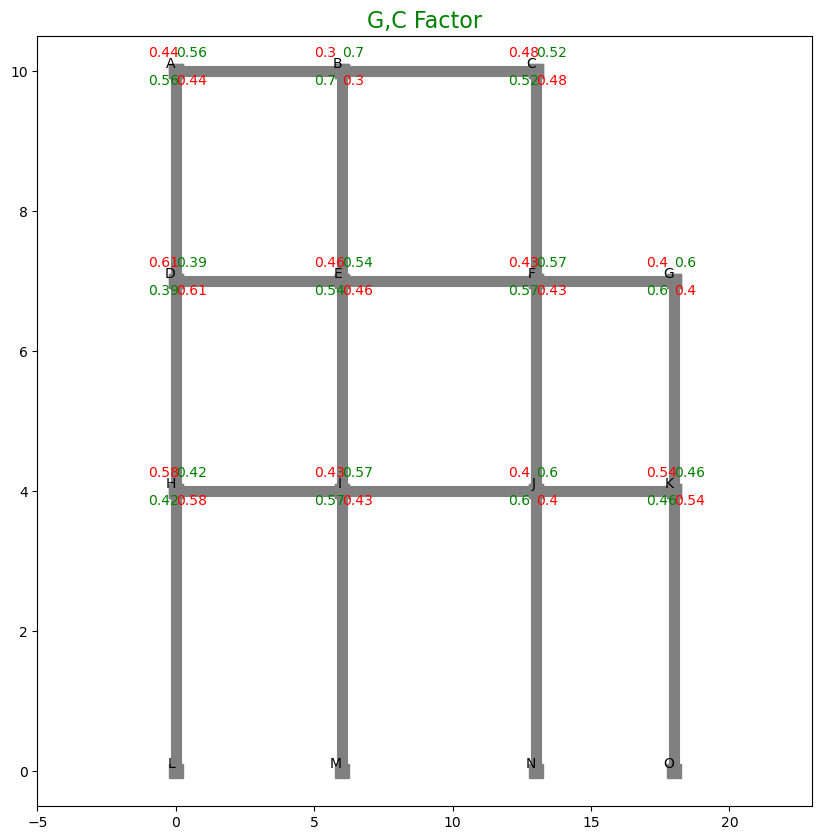

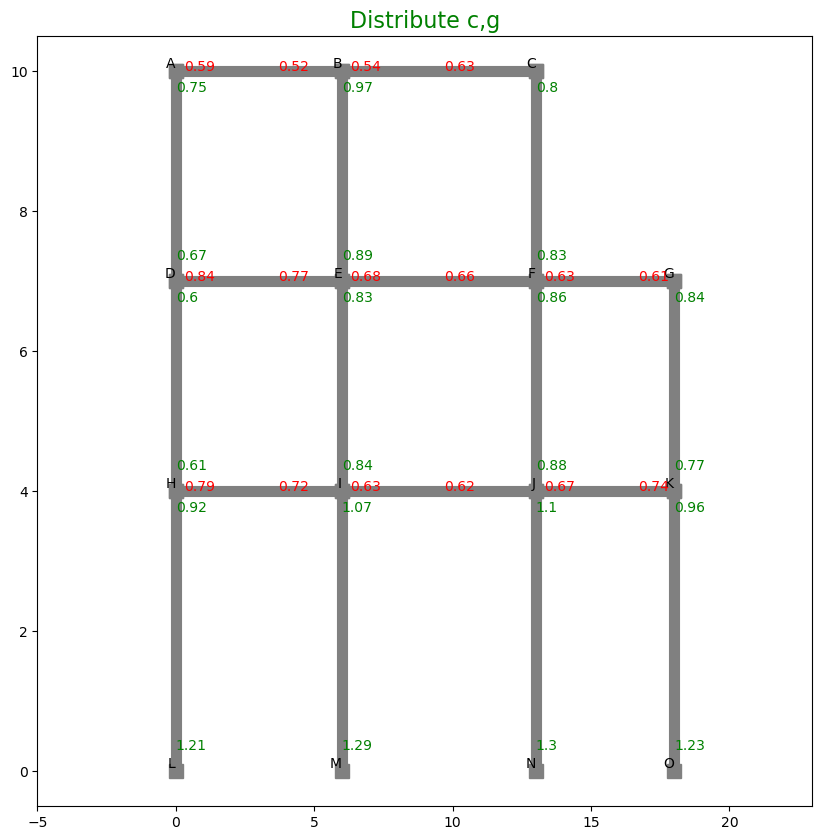

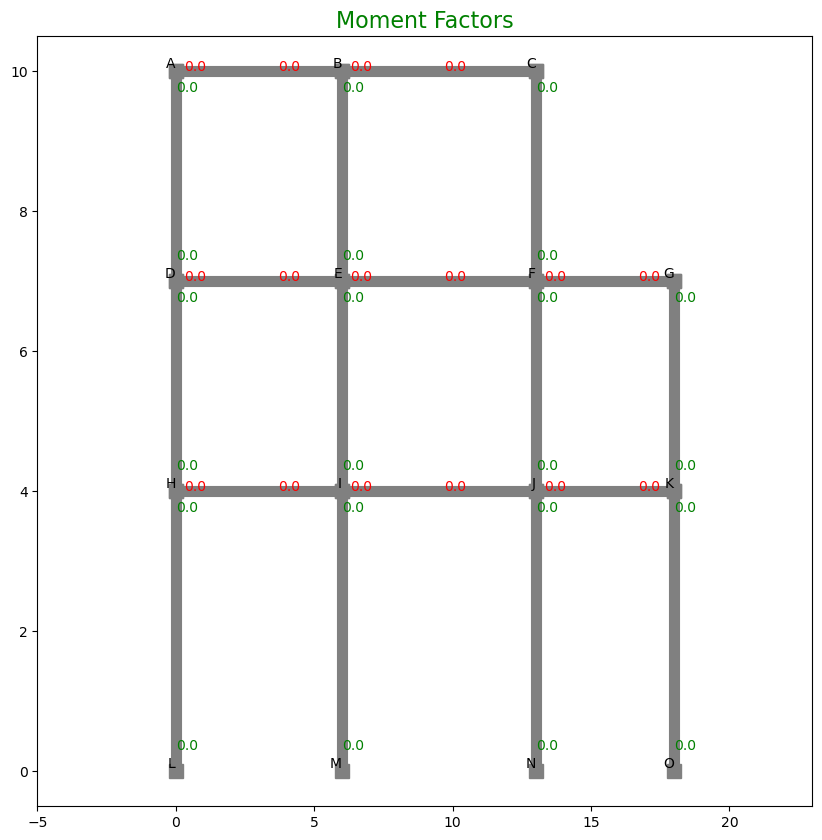

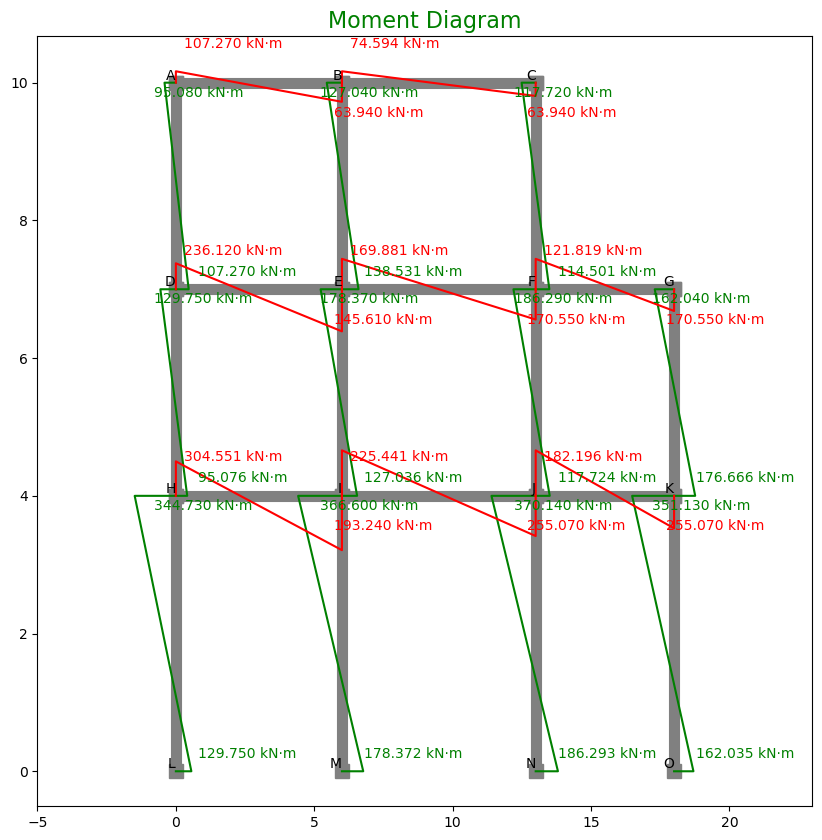

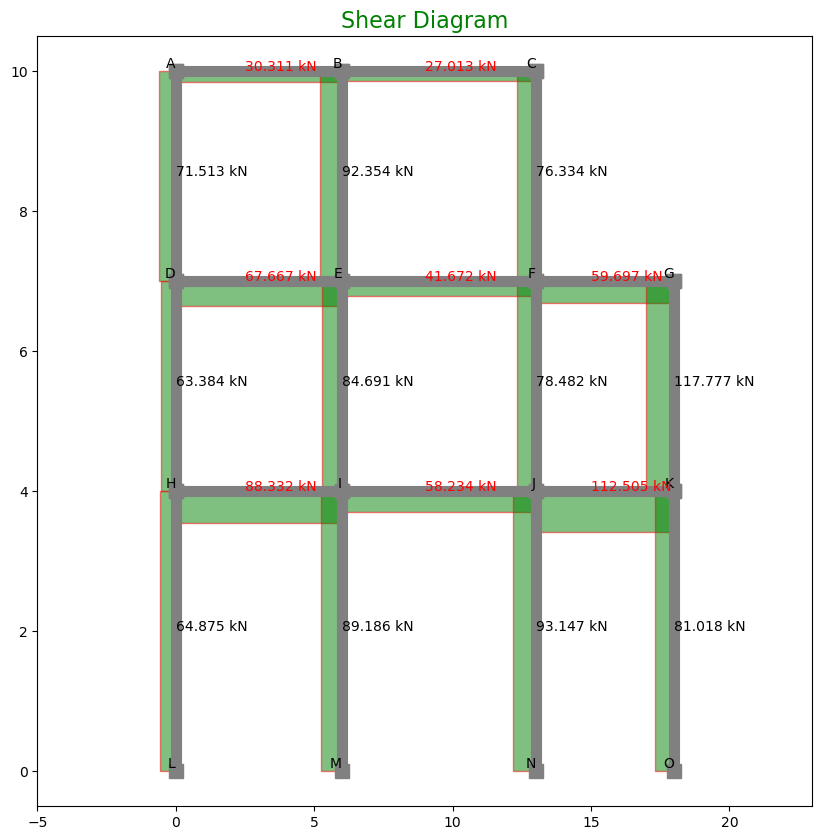

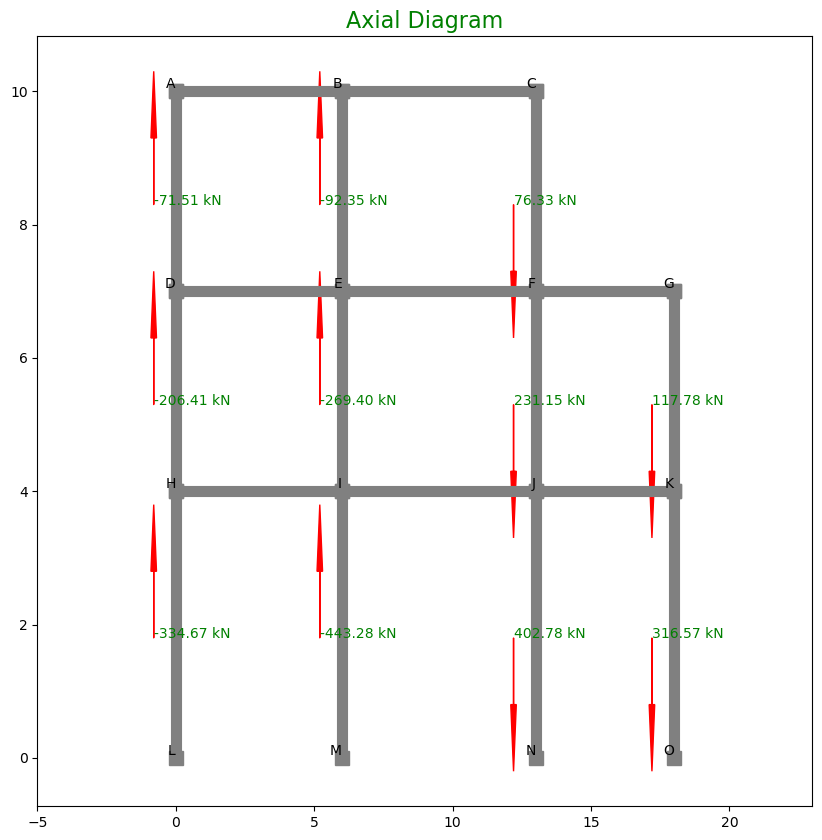

posx and posy should be finite values
posx and posy should be finite values


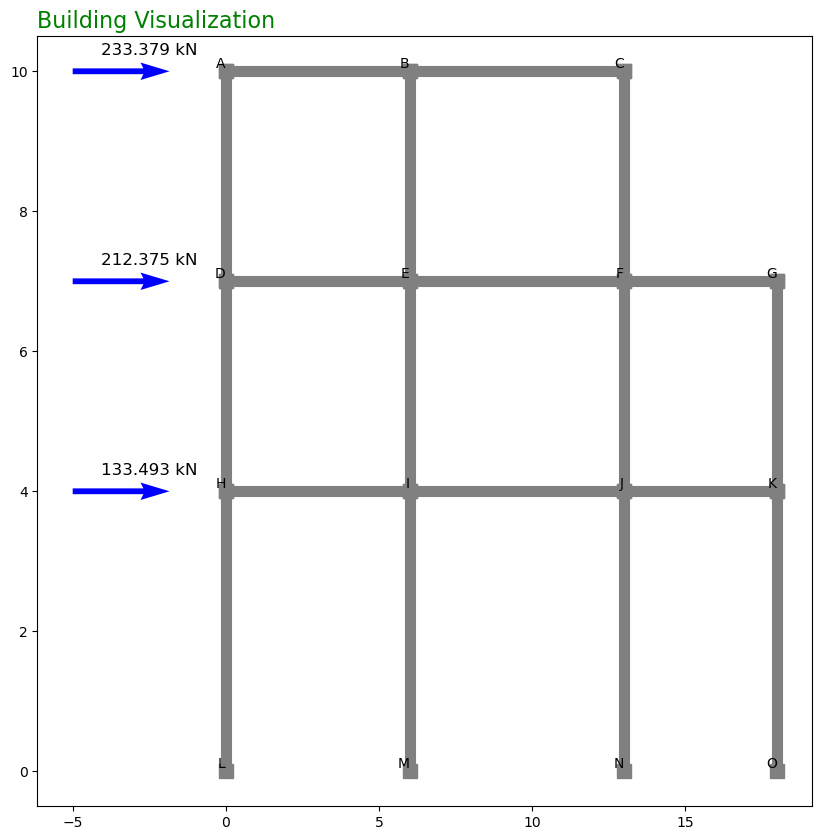

posx and posy should be finite values


In [ ]:
path = create_folder("Factor Method")
testdata = {}
mode = False
@handcalc(override = "long" , jupyter_display=False, precision=5)
def kl(b,h,length):
    I = (b*h**3)/12
    k = I/(length)
    return k,0

@handcalc(override = "long" , jupyter_display=False, precision=5)
def gfactor(k_col,k_girder):
    g = sum(k_col)/((sum(k_col))+sum(k_girder))
    c = 1 - g
    return g,c

@handcalc(override = "long" , jupyter_display=False, precision=5)
def gfactorhalfgirder(g_left,g_right):
    g_left_ = g_left + (g_right/2)
    g_right_ = g_right + (g_left/2)

    return g_left_,g_right_

@handcalc(override = "long" , jupyter_display=False, precision=5)
def gfactorhalfcol(c_bot,c_top):
    c_bot_ = c_bot + (c_top/2)
    c_top_ = c_top + (c_bot/2)
    return c_bot_,c_top_

@handcalc(override = "long" , jupyter_display=False, precision=5)
def momentfactorcol(c_bot,c_top,k):
    MomentFactor_bot = c_bot * k
    MomentFactor_top = c_top * k
    return MomentFactor_bot,MomentFactor_top

@handcalc(override = "long" , jupyter_display=False, precision=5)
def momentfactorBeam(g_left,g_right,k):
    MomentFactor_left = g_left * k
    MomentFactor_right = g_right * k
    return MomentFactor_left,MomentFactor_right

@handcalc(override = "long" , jupyter_display=False, precision=5)
def alp(Cm,f,h):
    alpha = (sum(f)*h)/sum(Cm)
    return alpha

@handcalc(override = "long" , jupyter_display=False, precision=5)
def MomentEndCol(MomentFactor_bot,MomentFactor_top,alpha):
    EndMoment_Bot = MomentFactor_bot *alpha
    EndMoment_Top = MomentFactor_top *alpha
    return EndMoment_Bot,EndMoment_Top

@handcalc(override = "long" , jupyter_display=False, precision=5)
def ShearBeam(Moment1,Moment2,Height):
    Shear = (Moment1+Moment2)/Height
    return Shear,0

@handcalc(override = "long" , jupyter_display=False, precision=5)
def ShearColumn(Moment1,Moment2,length):
    Shear = (Moment1+Moment2)/length
    return Shear,0
@handcalc(override = "long" , jupyter_display=False, precision=5)
def Shear(Factor_left,Factor_right,ColEndMoments,):
    beta = sum(ColEndMoments)/(Factor_left+Factor_right)
    MomentEnd_Left = Factor_left*beta
    MomentEnd_Right = Factor_right*beta
    return MomentEnd_Left,MomentEnd_Right

@handcalc(override = "long" , jupyter_display=False, precision=5)
def MomentEndBeam(Factor_left,Factor_right,ColEndMoments,):
    beta = sum(ColEndMoments)/(Factor_left+Factor_right)
    MomentEnd_Left = Factor_left*beta
    MomentEnd_Right = Factor_right*beta
    return MomentEnd_Left,MomentEnd_Right

@handcalc(override = "long" , jupyter_display=False, precision=5)
def AxialFactor(Axial,ShearBeam):
    Axial = sum(Axial)-sum(ShearBeam)

    return Axial,0

def magic(liasd):
    asfv = [ ]
    for i,j in enumerate(liasd):
        if i < 2:
            pass
        else:
            j * -1
        asfv.append(j)
    return asfv
keyfactor0_Fig, keyfactor0_Ax,asd = Frame(Array3d,ForceList, "Moment Diagram")
k_factor0_col = {}
for i, j in enumerate(ColCoordList[::-1]):
    j = j[~np.isnan(j).any(axis=(1,2))]

    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
            x = int(j1[0][0])
            y = int(j1[0][1])
            offsety = 0.1
            offsetx = 0.1
            scale = 1
            length = (int(j1[1][1]) - int(j1[0][1]))
            b = 0.4 
            h = 0.4 
            latexk0,asd = kl(b,h,length)
            add_latex_data(f"Factor-k-{i}",latexk0,ColName,mode)
            k_factor0_col.update({tuple(j1[0]): [asd[0]]}) if k_factor0_col.get(tuple(j1[0])) is None else k_factor0_col.get(tuple(j1[0])).append(asd[0])
            k_factor0_col.update({tuple(j1[1]): [asd[0]]}) if k_factor0_col.get(tuple(j1[1])) is None else k_factor0_col.get(tuple(j1[1])).append(asd[0])
            ktext = format(asd[0],".2e")
            keyfactor0_Ax.text(x, y+ (length/2)  , ktext,color = "green")

k_factor0_beam = {}
for i, j in enumerate(BeamCoordList[::-1]):
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                BeamName = f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.1
                offsetx = 0.1
                scale = 1
                b = 0.3
                h = 0.6
                height =  j1[1][0]  - j1[0][0] 
                latexk0,asd = kl(b,h,height)
                add_latex_data(f"Factor-k-g-{i}",latexk0,BeamName,mode)
                ktext = format(asd[0],".2e")
                k_factor0_beam.update({tuple(j1[0]): [asd[0]]}) if k_factor0_beam.get(tuple(j1[0])) is None else k_factor0_beam.get(tuple(j1[0])).append(asd[0])
                k_factor0_beam.update({tuple(j1[1]): [asd[0]]}) if k_factor0_beam.get(tuple(j1[1])) is None else k_factor0_beam.get(tuple(j1[1])).append(asd[0])
                
                keyfactor0_Ax.text(x+(length/2), y  , ktext,color = "red")
keyfactor0_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
keyfactor0_Fig.savefig(f"{path}\\kfactor0.png", dpi=300)


gfactor0_Fig, gfactor0_Ax,asd = Frame(Array3d,ForceList, "G,C Factor")
g_factor = {}
c_factor = {}
for i, j in enumerate(BeamCoordList[::-1]):
    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            BeamName = f"NODE-{LabelsDict.get(tuple(j1[0]))}"
            x = int(j1[0][0])
            y = int(j1[0][1])
            offsety = 0.2
            offsetx = 1
            scale = 1
            b = 0.3
            h = 0.6
            height =  j1[1][0]  - j1[0][0] 

            col = [0] if k_factor0_col.get(tuple(j1[0])) is None  else k_factor0_col.get(tuple(j1[0]))
            beam = [0] if k_factor0_beam.get(tuple(j1[0])) is None  else k_factor0_beam.get(tuple(j1[0]))
            
            latexk0,asd = gfactor(col,beam)
            
            add_latex_data(f"Factor-g-{i}",latexk0,BeamName,mode)
            g_factor.update({tuple(j1[0]): asd[0]}) if g_factor.get(tuple(j1[0])) is None else g_factor.get(tuple(j1[0])).append(asd[0])
            c_factor.update({tuple(j1[0]): asd[1]}) if c_factor.get(tuple(j1[0])) is None else c_factor.get(tuple(j1[0])).append(asd[1])
            ktext = round(asd[0],2)
            gfactor0_Ax.text(x, y-offsety  , ktext,color = "red")  
            gfactor0_Ax.text(x-offsetx, y+offsety  , ktext,color = "red") 
        
            cfactortext = round(asd[1],2)
            gfactor0_Ax.text(x, y+offsety  , cfactortext,color = "green")  
            gfactor0_Ax.text(x-offsetx, y-offsety  , cfactortext,color = "green") 
    BeamName = f"NODE-{LabelsDict.get(tuple(j1[1]))}"
    if not np.isnan(j1).any():
        x = int(j1[1][0])
        y = int(j1[1][1])
        asfas = 1
    else:
        x = int(j1[0][0])
        y = int(j1[0][1])
        asfas = 0
    offsety = 0.2
    offsetx = 1
    scale = 1
    b = 0.3
    h = 0.6
    height =  j1[1][0]  - j1[0][0] 

    col = [0] if k_factor0_col.get(tuple(j1[asfas])) is None  else k_factor0_col.get(tuple(j1[asfas]))
    beam = [0] if k_factor0_beam.get(tuple(j1[asfas])) is None  else k_factor0_beam.get(tuple(j1[asfas]))
    
    latexk0,asd = gfactor(col,beam)
    add_latex_data(f"Factor-g-{i}",latexk0,BeamName,mode)
    g_factor.update({tuple(j1[asfas]): asd[0]}) if g_factor.get(tuple(j1[asfas])) is None else g_factor.get(tuple(j1[asfas])).append(asd[0])
    c_factor.update({tuple(j1[asfas]): asd[1]}) if c_factor.get(tuple(j1[asfas])) is None else c_factor.get(tuple(j1[asfas])).append(asd[1])
    ktext = round(asd[0],2)
    gfactor0_Ax.text(x, y-offsety  , ktext,color = "red")  
    gfactor0_Ax.text(x-offsetx, y+offsety  , ktext,color = "red") 
    cfactortext = round(asd[1],2)
    gfactor0_Ax.text(x, y+offsety  , cfactortext,color = "green")  
    gfactor0_Ax.text(x-offsetx, y-offsety  , cfactortext,color = "green") 
gfactor0_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
gfactor0_Fig.savefig(f"{path}\\gfactor0.png", dpi=300)


print(c_factor)
print(g_factor)
ghalf_Fig, ghalf_Ax,asd = Frame(Array3d,ForceList, "Distribute c,g")
ghalf_col = {}
for i, j in enumerate(ColCoordList[::-1]):
    j = j[~np.isnan(j).any(axis=(1,2))]
    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            
            ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
            x = int(j1[0][0])
            y = int(j1[0][1])
            offsety = 0.3
            offsetx = 0.3
            scale = 1
            length = (int(j1[1][1]) - int(j1[0][1]))

            bot = c_factor.get(tuple(j1[0])) if c_factor.get(tuple(j1[0])) != None else 1
            top = c_factor.get(tuple(j1[1])) if c_factor.get(tuple(j1[1])) != None else 1
            latexk0,asd = gfactorhalfcol(bot,top)
            add_latex_data(f"g-halfcol-{i}",latexk0,ColName,mode)
            ghalf_col.update({tuple(j1[0]): [asd[0]]}) if ghalf_col.get(tuple(j1[0])) is None else ghalf_col.get(tuple(j1[0])).append(asd[0])
            ghalf_col.update({tuple(j1[1]): [asd[1]]}) if ghalf_col.get(tuple(j1[1])) is None else ghalf_col.get(tuple(j1[1])).append(asd[1])

            ghalf_Ax.text(x , y+ (length)- offsetx  , round(asd[1],2),color = "green")
            ghalf_Ax.text(x, y+ offsetx , round(asd[0],2),color = "green")

ghalf_beam = {}
for i, j in enumerate(BeamCoordList[::-1]):
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                BeamName = f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.3
                offsetx = 0.3
                scale = 1
                b = 0.3
                h = 0.6
                height =  j1[1][0]  - j1[0][0] 
                
                left = g_factor.get(tuple(j1[0])) if g_factor.get(tuple(j1[0])) != None else 1
                right = g_factor.get(tuple(j1[1])) if g_factor.get(tuple(j1[1])) != None else 1
                latexk0,asd = gfactorhalfgirder(left,right)
                add_latex_data(f"ghalf-beam-{i}",latexk0,BeamName,mode)
                ghalf_beam.update({tuple(j1[0]): [asd[0]]}) if ghalf_beam.get(tuple(j1[0])) is None else ghalf_beam.get(tuple(j1[0])).append(asd[0])
                ghalf_beam.update({tuple(j1[1]): [asd[1]]}) if ghalf_beam.get(tuple(j1[1])) is None else ghalf_beam.get(tuple(j1[1])).append(asd[1])
                
                ghalf_Ax.text(x+(length)-offsetx, y  , round(asd[1],2),color = "red")
                ghalf_Ax.text(x+offsetx, y  , round(asd[0],2),color = "red")
ghalf_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
ghalf_Fig.savefig(f"{path}\\ghalf.png", dpi=300)

Moment_Fig, Moment_Ax,asd = Frame(Array3d,ForceList, "Moment Factors")
Moment_Factors_Col = {}
cm_master_list_col = []
for i, j in enumerate(ColCoordList[::-1]):
    j = j[~np.isnan(j).any(axis=(1,2))]
    cm_list = []
    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
            x = int(j1[0][0])
            y = int(j1[0][1])
            offsety = 0.3
            offsetx = 0.3
            length = (int(j1[1][1]) - int(j1[0][1]))
            k = k_factor0_col.get(tuple(j1[0]))
            k = float(k[0] if len(k) < 2 else k[-1])
            bot = ghalf_col.get(tuple(j1[0]))
            top = ghalf_col.get(tuple(j1[1]))
            bot = float(bot[0] if len(bot) < 2 else bot[0])
            top = float(top[0] if len(top) < 2 else top[0])
            # print(j1,ColName)
            # print(bot*23.4,top*23.4,k)
            latexk0,asd = momentfactorcol(bot,top,k)
            add_latex_data(f"momentfactorcol-{i}",latexk0,ColName,mode)
            Moment_Factors_Col.update({tuple(j1[0]): [asd[0]]}) if Moment_Factors_Col.get(tuple(j1[0])) is None else Moment_Factors_Col.get(tuple(j1[0])).append(asd[0])
            Moment_Factors_Col.update({tuple(j1[1]): [asd[1]]}) if Moment_Factors_Col.get(tuple(j1[1])) is None else Moment_Factors_Col.get(tuple(j1[1])).append(asd[1])

            Moment_Ax.text(x , y+ (length)- offsetx  , np.round(asd[1],2),color = "green")
            Moment_Ax.text(x, y+ offsetx , np.round(asd[0],2),color = "green")
            cm_list.append(asd[0])
            cm_list.append(asd[1])
    cm_master_list_col.append(cm_list)
Moment_Factors_Beam = {}
cm_master_list_beam = []
for i, j in enumerate(BeamCoordList[::-1]):
        cm_list = []
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                BeamName = f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.3
                offsetx = 0.3
                scale = 1
                b = 0.3
                h = 0.6
                height =  j1[1][0]  - j1[0][0] 
                k = k_factor0_beam.get(tuple(j1[0]))
                k = float(k[0] if len(k) < 2 else k[-1])

                left = ghalf_beam.get(tuple(j1[0])) 
                right = ghalf_beam.get(tuple(j1[1]))
                left = float(left[0] if len(left) < 2 else left[0])
                right = float(right[0] if len(right) < 2 else right[0])

                latexk0,asd = momentfactorBeam(left,right,k)
                add_latex_data(f"momentfactorbeam-{i}",latexk0,BeamName,mode)
                Moment_Factors_Beam.update({tuple(j1[0]): [asd[0]]}) if Moment_Factors_Beam.get(tuple(j1[0])) is None else Moment_Factors_Beam.get(tuple(j1[0])).append(asd[0])
                Moment_Factors_Beam.update({tuple(j1[1]): [asd[1]]}) if Moment_Factors_Beam.get(tuple(j1[1])) is None else Moment_Factors_Beam.get(tuple(j1[1])).append(asd[1])
                
                Moment_Ax.text(x+(length)-offsetx, y  , np.round(asd[1],2),color = "red")
                Moment_Ax.text(x+offsetx, y  , np.round(asd[0],2),color = "red")
                cm_list.append(asd[0])
                cm_list.append(asd[1])
        cm_master_list_beam.append(cm_list)
Moment_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
Moment_Fig.savefig(f"{path}\\moment factors.png", dpi=300)

# cm_list = []
# for i, j in enumerate(ColCoordList[::-1]):
#     j = j[~np.isnan(j).any(axis=(1,2))]
#     for i1, j1 in enumerate(j):
#         if not np.isnan(j1).any():
#             ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
#             x = int(j1[0][0])
#             y = int(j1[0][1])
#             offsety = 0.3
#             offsetx = 0.3
#             length = (int(j1[1][1]) - int(j1[0][1]))

alphalist = []
for i,j in enumerate(cm_master_list_col):
    floor = f"Floor-{len(BuildingHeightList)-i}"
    latexAlpha,asd = alp(j,ForceReverse[:i+1],BuildingHeightList[::-1][i])
    add_latex_data(f"alpha-{i}",latexAlpha,BeamName,mode)
    alphalist.append(asd)

Moment_End_Col = {}
for i, j in enumerate(ColCoordList[::-1]):
    j = j[~np.isnan(j).any(axis=(1,2))]
    cm_list = []
    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
            x = int(j1[0][0])
            y = int(j1[0][1])
            length = (int(j1[1][1]) - int(j1[0][1]))
            bot = Moment_Factors_Col.get(tuple(j1[0]))
            top = Moment_Factors_Col.get(tuple(j1[1]))
            alpha = alphalist[i]
            latexmomentcol,asd = MomentEndCol(bot[0],top[-1],alpha)
            add_latex_data(f"FactorMomentCol-{i}",latexmomentcol,ColName,mode)

            Moment_End_Col.update({tuple(j1[0]): [asd[0]]}) if Moment_End_Col.get(tuple(j1[0])) is None else Moment_End_Col.get(tuple(j1[0])).append(asd[0])
            Moment_End_Col.update({tuple(j1[1]): [asd[1]]}) if Moment_End_Col.get(tuple(j1[1])) is None else Moment_End_Col.get(tuple(j1[1])).append(asd[1])
                




Moment_Beam_ = {}
for i, j in enumerate(BeamCoordList[::-1]):
    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            BeamName = f"NODE-{LabelsDict.get(tuple(j1[0]))}"
            x = int(j1[0][0])
            y = int(j1[0][1])
            offsety = 0.2
            offsetx = 1
            scale = 1
            b = 0.3
            h = 0.6
            height =  j1[1][0]  - j1[0][0] 

            ColEndMoments = [0] if Moment_End_Col.get(tuple(j1[0])) is None  else Moment_End_Col.get(tuple(j1[0]))
            leftArray = Moment_Factors_Beam.get(tuple(j1[0]))

            left = leftArray[0] if type(leftArray) == list and len(leftArray) > 1 else leftArray[0]
            right = leftArray[-1] if type(leftArray) == list and len(leftArray) > 1 else 0
            print(j1[0],BeamName)
            print(leftArray,left,right,ColEndMoments)
            latexk0,asd = MomentEndBeam(left,right,ColEndMoments)
            
            add_latex_data(f"FactorMomentsBeams-{i}",latexk0,BeamName,mode)
            Moment_Beam_.update({tuple(j1[0]): [asd[0]]}) if Moment_Beam_.get(tuple(j1[0])) is None else Moment_Beam_.get(tuple(j1[0])).append(asd[0])
            Moment_Beam_.update({tuple(j1[0]): [asd[1]]}) if Moment_Beam_.get(tuple(j1[0])) is None else Moment_Beam_.get(tuple(j1[0])).append(asd[1])

    BeamName = f"NODE-{LabelsDict.get(tuple(j1[1]))}"
    if not np.isnan(j1).any():
        x = int(j1[1][0])
        y = int(j1[1][1])
        asfas = 1
    else:
        x = int(j1[0][0])
        y = int(j1[0][1])
        asfas = 0
    offsety = 0.2
    offsetx = 1
    scale = 1
    b = 0.3
    h = 0.6
    height =  j1[1][0]  - j1[0][0] 
    ColEndMoments = [0] if Moment_End_Col.get(tuple(j1[asfas])) is None  else Moment_End_Col.get(tuple(j1[asfas]))
    Moment_Factors_Beams = [0] if Moment_Factors_Beam.get(tuple(j1[asfas])) is None  else Moment_Factors_Beam.get(tuple(j1[asfas]))
            
    left = leftArray[0] if type(leftArray) == list and len(leftArray) > 1 else leftArray
    right = 0
    latexk0,asd = MomentEndBeam(left,right,ColEndMoments)

    add_latex_data(f"FactorMomentsBeams-{i}",latexk0,BeamName,mode)
    Moment_Beam_.update({tuple(j1[asfas]): [asd[0]]}) if Moment_Beam_.get(tuple(j1[asfas])) is None else Moment_Beam_.get(tuple(j1[asfas])).append(asd[0])
    Moment_Beam_.update({tuple(j1[asfas]): [asd[1]]}) if Moment_Beam_.get(tuple(j1[asfas])) is None else Moment_Beam_.get(tuple(j1[asfas])).append(asd[1])
    ktext = round(asd[0],2)

BeamShearFactor = {}
BeamMomentFactor = {}
for i, j in enumerate(BeamCoordList[::-1]):
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                BeamName = f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                length = j1[1][0]  - j1[0][0] 
                # BeamList = BeamShear.get(tuple(j1[0]))
                Moment1 = [0] if Moment_Beam_.get(tuple(j1[0])) is None  else Moment_Beam_.get(tuple(j1[0]))
                Moment2 = [0] if Moment_Beam_.get(tuple(j1[1])) is None  else Moment_Beam_.get(tuple(j1[1]))

                LatexBeamAxial, asd = ShearBeam(Moment1[0],Moment2[0],length)

                add_latex_data(f"Factor-Beam-{i}",LatexBeamAxial,BeamName)
                BeamShearFactor.update({tuple(j1[0]): [asd[0]]}) if BeamShearFactor.get(tuple(j1[0])) is None else BeamShearFactor.get(tuple(j1[0])).append(asd[0])
                BeamShearFactor.update({tuple(j1[1]): [asd[0]*-1]}) if BeamShearFactor.get(tuple(j1[1])) is None else BeamShearFactor.get(tuple(j1[1])).append(asd[0]*-1)

ColMomentFactor = {}
ColShearFactor = {}
for i, j in enumerate(ColCoordList[::-1]):
        j = j[~np.isnan(j).any(axis=(1,2))]
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                height = (int(j1[1][1]) - int(j1[0][1]))
                # BeamList = BeamShear.get(tuple(j1[0]))
                Moment1 = [0] if Moment_End_Col.get(tuple(j1[1])) is None  else Moment_End_Col.get(tuple(j1[1]))
                Moment2 = [0] if Moment_End_Col.get(tuple(j1[1])) is None  else abs_list(Moment_End_Col.get(tuple(j1[1])))
                # print(ColName)
                # print(ColMomentArray,BeamMomentArray)
                LatexColAxial, asd = ShearColumn(Moment1[0],Moment2[0],height)
                # print(asd[0] )

                add_latex_data(f"Factor-Col-{i}",LatexColAxial,ColName)
                ColShearFactor.update({tuple(j1[0]): [asd[0]]}) if ColShearFactor.get(tuple(j1[0])) is None else ColShearFactor.get(tuple(j1[0])).append(asd[0])
                ColShearFactor.update({tuple(j1[1]): [asd[0]*-1]}) if ColShearFactor.get(tuple(j1[1])) is None else ColShearFactor.get(tuple(j1[1])).append(asd[0]*-1)

ColMomentFactor_Fig, ColMomentFactor_Ax,asd = Frame(Array3d,ForceList, "Moment Diagram")
for i,j in enumerate(ColCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.2
                offsetx = 0.8 
                scale = 1
                Moment0 = abs(Moment_End_Col.get(tuple(j1[0]))[0])/(kN)
                Moment1 = abs(Moment_End_Col.get(tuple(j1[1]))[0])/(kN)
                width0 = min(sum(BuildingSpanList)/len(BuildingSpanList),min(BuildingSpanList)/2)*scale*(Moment0/(np.nanmax(ForceListCum)/kN))
                width1 = min(sum(BuildingSpanList)/len(BuildingSpanList),min(BuildingSpanList)/2)*scale*(Moment1/(np.nanmax(ForceListCum)/kN))
                height = (int(j1[1][1]) - int(j1[0][1]))
                ColMomentFactor_Ax.text(x-offsetx, y+ height -offsety  , round(Moment0,2)*kN*m,color = "green")
                ColMomentFactor_Ax.text(x+offsetx, y+ offsety , Moment1*kN*m,color = "green")
                ColMomentFactor_Ax.plot([x, x+width1,  x-width0, x],
                  [y, y, y+height, y+height], 
                          color='green')


for i,j in enumerate(BeamCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.5
                offsetx = 0.3 
                scale = 1
                Moment0 = abs(Moment_Beam_.get(tuple(j1[0]))[0])/(kN)
                Moment1 = abs(Moment_Beam_.get(tuple(j1[1]))[1])/(kN) if abs(Moment_Beam_.get(tuple(j1[1]))[1])/(kN) > 0 else abs(Moment_Beam_Factor.get(tuple(j1[0]))[1])/(kN)
                width0 = min(sum(BuildingHeightList)/len(BuildingHeightList),min(BuildingHeightList)/2)*scale*(Moment0/(np.nanmax(ForceListCum)/kN))
                width1 = min(sum(BuildingHeightList)/len(BuildingHeightList),min(BuildingHeightList)/2)*scale*(Moment1/(np.nanmax(ForceListCum)/kN))
                length = (int(j1[1][0]) - int(j1[0][0]))
                ColMomentFactor_Ax.text(x+length-offsetx, y-offsety  , round(Moment1,2)*kN*m,color = "red")
                ColMomentFactor_Ax.text(x+offsetx, y+ offsety , Moment0*kN*m,color = "red")
                ColMomentFactor_Ax.plot([x, x,  x+length, x+length],
                  [y, y+width1, y-width0, y], 
                          color='red')
ColMomentFactor_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
ColMomentFactor_Fig.savefig(f"{path}\\CantiMoment.png", dpi=300)

ColShearFactor_Fig, ColShearFactor_Ax,asd = Frame(Array3d,ForceList, "Shear Diagram")
for i,j in enumerate(BeamCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                offsettext = 0.5
                x = int(j1[0][0])
                y = int(j1[0][1])
                scale = 1
                shear = abs(BeamShearFactor.get(tuple(j1[1]))[0])/kN
                width = -1*(min(sum(BuildingHeightList)/len(BuildingHeightList),min(BuildingHeightList))*scale*(shear/(np.nanmax(ForceListCum)/kN)))
                length = (int(j1[1][0]) - int(j1[0][0]))
                ColShearFactor_Ax.text(x+(length/2)-offsettext, y , shear*kN,color = "red")
                rect = patches.Rectangle((x,y),length,width,linewidth=1,edgecolor='r',facecolor='green', alpha=0.5)
                ColShearFactor_Ax.add_patch(rect)


for i,j in enumerate(ColCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                x = int(j1[0][0])
                y = int(j1[0][1])
                scale = 1
                shear = abs((ColShearFactor.get(tuple(j1[0]))[0])/kN)
                width = -1*(min(sum(BuildingSpanList)/len(BuildingSpanList),min(BuildingSpanList))*scale*(shear/(np.nanmax(ForceListCum)/kN)))
                height = (int(j1[1][1]) - int(j1[0][1]))
                ColShearFactor_Ax.text(x, y+(height/2) , shear*kN)
                rect = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='green', alpha=0.5)
                ColShearFactor_Ax.add_patch(rect)


ColShearFactor_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
ColShearFactor_Fig.savefig(f"{path}\\FactorShear.png", dpi=300)


ColAxialFactor = {}
for i, j in enumerate(ColCoordList[::-1]):
        j = j[~np.isnan(j).any(axis=(1,2))]
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                height = (int(j1[1][1]) - int(j1[0][1]))
                # BeamList = BeamShear.get(tuple(j1[0]))
                Axial = [0] if ColAxialFactor.get(tuple(j1[1])) is None  else ColAxialFactor.get(tuple(j1[1]))
                Shear1 = [0] if ColShearFactor.get(tuple(j1[1])) is None  else abs_list(ColShearFactor.get(tuple(j1[1])))
                # print(ColName)
                # print(ColMomentArray,BeamMomentArray)
                LatexColAxial, asd = AxialFactor(Axial,Shear1)
                # print(asd[0] )

                add_latex_data(f"Factor-Axial-Col-{i}",LatexColAxial,ColName,mode)
                ColAxialFactor.update({tuple(j1[0]): [asd[0]]}) if ColAxialFactor.get(tuple(j1[0])) is None else ColAxialFactor.get(tuple(j1[0])).append(asd[0])
                ColAxialFactor.update({tuple(j1[1]): [asd[0]*-1]}) if ColAxialFactor.get(tuple(j1[1])) is None else ColAxialFactor.get(tuple(j1[1])).append(asd[0]*-1)


ColAxialFactor_Fig, ColAxialFactor_Ax,asd = Frame(Array3d,ForceList, "Axial Diagram")
for i,j in enumerate(ColCoordList):
        for i1,j1 in enumerate(j):
            if not np.isnan(j1).any():
                magic = 1
                if i1 > 1:
                     magic = -1
                x = int(j1[0][0])
                y = int(j1[0][1])
                offsety = 0.2
                offsetx = 0.8 
                scale = 2

                Axial = (ColAxialFactor.get(tuple(j1[0]))[0]) * magic
                height = (int(j1[1][1]) - int(j1[0][1]))
                ColAxialFactor_Ax.arrow(x-offsetx, y+ height/2 -offsety, 0, -1, color='red', head_width=0.2, head_length=1) if Axial > 0 else ColAxialFactor_Ax.arrow(x-offsetx, y+ height/2 -offsety, 0, 1, color='red', head_width=0.2, head_length=1)

                ColAxialFactor_Ax.text(x-offsetx, y+ height/2 -offsety  , round(Axial,2),color = "green")

ColAxialFactor_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
ColAxialFactor_Fig.savefig(f"{path}\\FactorAxial.png", dpi=300)

html_makerl(mode)
ColAxialFactor_Fig1, ColAxialFactor_Ax1,asd = Frame1(Array3d,ForceList)
ColAxialFactor_Ax1.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
ColAxialFactor_Fig1.savefig(f"{path}\\sasfasfaFactorAxial.png", dpi=300)


In [ ]:
html_makerl()
selenium_screenshot()


C:\Users\63976\AppData\Local\Temp\ipykernel_14888\602502590.py:101: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"chromedriver.exe", options=chrome_options)


c:\Users\63976\Documents\Xlwings\pihuts\Beams\0.html
c:\Users\63976\Documents\Xlwings\pihuts\Beams\1.html
c:\Users\63976\Documents\Xlwings\pihuts\Beams\2.html
c:\Users\63976\Documents\Xlwings\pihuts\Beams\3.html
c:\Users\63976\Documents\Xlwings\pihuts\Beams\4.html
c:\Users\63976\Documents\Xlwings\pihuts\Beams\5.html
c:\Users\63976\Documents\Xlwings\pihuts\Beams\6.html


In [6]:
%%render
y = 1
x_  = 12-(2*y)
x = 2*y+x_-1

<IPython.core.display.Latex object>